In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [10]:
import catboost as cat

In [11]:
import data
import config

In [12]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [13]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [14]:
traintest.num_dataset()

5

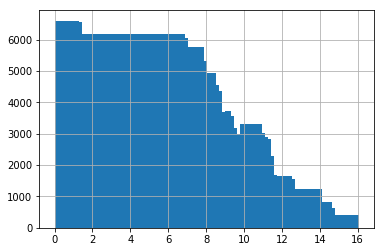

In [15]:
traintest.ydf.hist(bins=100);

In [16]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [17]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [18]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [19]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [20]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [21]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [22]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [23]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [24]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [25]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [26]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [27]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


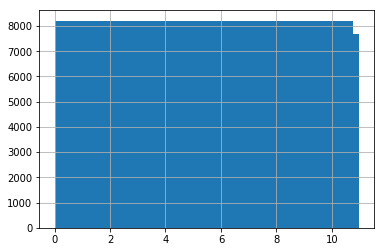

In [28]:
ydf.hist(bins=50);

In [29]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [30]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [31]:
GNO=207
!mkdir -p input/sub/{GNO}

In [32]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/207'

In [33]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [45]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    train_pool=cat.Pool(Xtr,ytr)
    valid_pool=cat.Pool(Xte,yte)
    model = cat.CatBoostRegressor(iterations = 5000, thread_count = n_thread, **params)
    model.fit(train_pool,eval_set=valid_pool,use_best_model=True)
    make_sub(model,qno)
    a =  model.get_best_score()
    return a['validation_0']['MAE'], model.get_best_iteration()

In [46]:
params = {'objective':"MAE",
          'max_depth':8, 
          'learning_rate':0.03,
          'border_count':128,
          'l2_leaf_reg':2,
           "colsample_bylevel":0.7,
            'leaf_estimation_method':'Gradient',
          #'min_data_in_leaf' : 1,
          'metric_period' : 100,
          'early_stopping_rounds': 100,
          'eval_metric':'MAE',
            #'fold_len_multiplier':[1.05,1.5,2], 
            #'bagging_temperature':[1,0.75,0.5]
            #,'random_strength':[0.5,1,1.5],
           }

In [47]:
best_mae=1e10

In [48]:
def lgbcv(learning_rate, border_count,l2_leaf_reg,max_depth,
          colsample_bylevel, random_seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['border_count']=int(border_count)
    newparams['max_depth']=int(max_depth)
    #newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [49]:
best={'border_count': 105.38862817566795,
 'colsample_bylevel': 0.3109195724876211,
 'l2_leaf_reg': 0.3326080844078498,
 'learning_rate': 0.02140254888564618,
 'max_depth': 4.2620874566675875}

In [50]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    print 'seed',randseed
    best['random_seed']=randseed
    a=lgbcv(**best)
    scores.append(a)

seed 7050180
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)


0:	learn: 5.4695240	test: 5.4712611	best: 5.4712611 (0)	total: 95.4ms	remaining: 7m 56s
100:	learn: 4.5571003	test: 4.5500297	best: 4.5500297 (100)	total: 8.75s	remaining: 7m 4s
200:	learn: 3.8582121	test: 3.8280317	best: 3.8280317 (200)	total: 17.5s	remaining: 6m 57s
300:	learn: 3.2642495	test: 3.2162595	best: 3.2162595 (300)	total: 26.6s	remaining: 6m 55s
400:	learn: 2.7423299	test: 2.7236331	best: 2.7236331 (400)	total: 35.7s	remaining: 6m 48s
500:	learn: 2.2922419	test: 2.3599088	best: 2.3599088 (500)	total: 44.7s	remaining: 6m 41s
600:	learn: 1.9176000	test: 2.0425355	best: 2.0425355 (600)	total: 53.6s	remaining: 6m 32s
700:	learn: 1.6145375	test: 1.7721697	best: 1.7721697 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.3855321	test: 1.5461997	best: 1.5461997 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.2287576	test: 1.3713309	best: 1.3713309 (900)	total: 1m 20s	remaining: 6m 7s
1000:	learn: 1.1229674	test: 1.2434115	best: 1.2434115 (1000)	total: 1m 29s	remaining: 5m 57s

0:	learn: 5.4691570	test: 5.4747117	best: 5.4747117 (0)	total: 83.4ms	remaining: 6m 56s
100:	learn: 4.5558057	test: 4.5757022	best: 4.5757022 (100)	total: 8.55s	remaining: 6m 54s
200:	learn: 3.8558802	test: 3.8911143	best: 3.8911143 (200)	total: 17.2s	remaining: 6m 49s
300:	learn: 3.2618130	test: 3.3172891	best: 3.3172891 (300)	total: 26.3s	remaining: 6m 49s
400:	learn: 2.7401115	test: 2.8313800	best: 2.8313800 (400)	total: 35.1s	remaining: 6m 41s
500:	learn: 2.2926054	test: 2.4470193	best: 2.4470193 (500)	total: 43.9s	remaining: 6m 34s
600:	learn: 1.9119787	test: 2.1374565	best: 2.1374565 (600)	total: 53s	remaining: 6m 28s
700:	learn: 1.6044134	test: 1.8825805	best: 1.8825805 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.3746298	test: 1.6750467	best: 1.6750467 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.2180002	test: 1.5100298	best: 1.5100298 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 1.1133066	test: 1.3876763	best: 1.3876763 (1000)	total: 1m 28s	remaining: 5m 52s


0:	learn: 5.4698569	test: 5.4661026	best: 5.4661026 (0)	total: 90.2ms	remaining: 7m 30s
100:	learn: 4.5574104	test: 4.5553851	best: 4.5553851 (100)	total: 8.87s	remaining: 7m 10s
200:	learn: 3.8559190	test: 3.8483510	best: 3.8483510 (200)	total: 17.8s	remaining: 7m 4s
300:	learn: 3.2633986	test: 3.2316269	best: 3.2316269 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 2.7478079	test: 2.6873698	best: 2.6873698 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 2.3099582	test: 2.2138756	best: 2.2138756 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.9409019	test: 1.7899805	best: 1.7899805 (600)	total: 54.6s	remaining: 6m 39s
700:	learn: 1.6402347	test: 1.4312129	best: 1.4312129 (700)	total: 1m 4s	remaining: 6m 33s
800:	learn: 1.4135523	test: 1.1467395	best: 1.1467395 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2571994	test: 0.9461450	best: 0.9461450 (900)	total: 1m 22s	remaining: 6m 14s
1000:	learn: 1.1484750	test: 0.8331107	best: 0.8331107 (1000)	total: 1m 31s	remaining: 6m 4s


0:	learn: 5.4693736	test: 5.4728479	best: 5.4728479 (0)	total: 123ms	remaining: 10m 15s
100:	learn: 4.5566541	test: 4.5701275	best: 4.5701275 (100)	total: 8.9s	remaining: 7m 11s
200:	learn: 3.8547707	test: 3.8993143	best: 3.8993143 (200)	total: 17.6s	remaining: 7m
300:	learn: 3.2571791	test: 3.3411301	best: 3.3411301 (300)	total: 26.4s	remaining: 6m 51s
400:	learn: 2.7366875	test: 2.8597447	best: 2.8597447 (400)	total: 35.6s	remaining: 6m 48s
500:	learn: 2.2952473	test: 2.4445377	best: 2.4445377 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 1.9233898	test: 2.0785762	best: 2.0785762 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 1.6222206	test: 1.7585358	best: 1.7585358 (700)	total: 1m 2s	remaining: 6m 23s
800:	learn: 1.3940361	test: 1.5098322	best: 1.5098322 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.2379816	test: 1.3280120	best: 1.3280120 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.1333853	test: 1.1953887	best: 1.1953887 (1000)	total: 1m 29s	remaining: 5m 56s
110

0:	learn: 5.4699495	test: 5.4639766	best: 5.4639766 (0)	total: 93.8ms	remaining: 7m 48s
100:	learn: 4.5564911	test: 4.5490250	best: 4.5490250 (100)	total: 8.95s	remaining: 7m 14s
200:	learn: 3.8540674	test: 3.8190963	best: 3.8190963 (200)	total: 18.3s	remaining: 7m 15s
300:	learn: 3.2564847	test: 3.1987380	best: 3.1987380 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 2.7372334	test: 2.6590489	best: 2.6590489 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 2.2972920	test: 2.1976952	best: 2.1976952 (500)	total: 46.1s	remaining: 6m 54s
600:	learn: 1.9255538	test: 1.8305805	best: 1.8305805 (600)	total: 55.3s	remaining: 6m 44s
700:	learn: 1.6195249	test: 1.5835115	best: 1.5835115 (700)	total: 1m 4s	remaining: 6m 35s
800:	learn: 1.3882550	test: 1.4112793	best: 1.4112793 (800)	total: 1m 13s	remaining: 6m 26s
900:	learn: 1.2311738	test: 1.3118636	best: 1.3118636 (900)	total: 1m 23s	remaining: 6m 18s
1000:	learn: 1.1263756	test: 1.2364060	best: 1.2364060 (1000)	total: 1m 32s	remaining: 6m 7s

0:	learn: 5.4701182	test: 5.4594640	best: 5.4594640 (0)	total: 95ms	remaining: 7m 54s
100:	learn: 4.5579596	test: 4.5318117	best: 4.5318117 (100)	total: 8.96s	remaining: 7m 14s
200:	learn: 3.8560178	test: 3.8080131	best: 3.8080131 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 3.2564458	test: 3.2205881	best: 3.2205881 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 2.7358432	test: 2.7094602	best: 2.7094602 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 2.2975155	test: 2.2761742	best: 2.2761742 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.9273225	test: 1.9105234	best: 1.9105234 (600)	total: 55.8s	remaining: 6m 48s
700:	learn: 1.6235097	test: 1.6205345	best: 1.6205345 (700)	total: 1m 5s	remaining: 6m 39s
800:	learn: 1.3895805	test: 1.4586434	best: 1.4586434 (800)	total: 1m 14s	remaining: 6m 29s
900:	learn: 1.2275045	test: 1.3937740	best: 1.3937740 (900)	total: 1m 23s	remaining: 6m 20s
1000:	learn: 1.1201648	test: 1.3388955	best: 1.3388955 (1000)	total: 1m 32s	remaining: 6m 10s
1

0:	learn: 5.4688860	test: 5.4764639	best: 5.4764639 (0)	total: 93.9ms	remaining: 7m 49s
100:	learn: 4.5561214	test: 4.5704354	best: 4.5704354 (100)	total: 8.51s	remaining: 6m 52s
200:	learn: 3.8564467	test: 3.8854429	best: 3.8854429 (200)	total: 17s	remaining: 6m 45s
300:	learn: 3.2638723	test: 3.3007657	best: 3.3007657 (300)	total: 26s	remaining: 6m 46s
400:	learn: 2.7473459	test: 2.7909171	best: 2.7909171 (400)	total: 34.7s	remaining: 6m 38s
500:	learn: 2.3067559	test: 2.3571228	best: 2.3571228 (500)	total: 43.6s	remaining: 6m 31s
600:	learn: 1.9256693	test: 2.0345846	best: 2.0345846 (600)	total: 52.6s	remaining: 6m 24s
700:	learn: 1.6109697	test: 1.8155088	best: 1.8155088 (700)	total: 1m 1s	remaining: 6m 16s
800:	learn: 1.3782569	test: 1.6273860	best: 1.6273860 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 1.2193907	test: 1.4873881	best: 1.4873881 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 1.1097136	test: 1.4049272	best: 1.4049272 (1000)	total: 1m 27s	remaining: 5m 50s
11

0:	learn: 5.4700400	test: 5.4621183	best: 5.4621183 (0)	total: 97.3ms	remaining: 8m 6s
100:	learn: 4.5582454	test: 4.5337536	best: 4.5337536 (100)	total: 8.97s	remaining: 7m 15s
200:	learn: 3.8568952	test: 3.7867503	best: 3.7867503 (200)	total: 18s	remaining: 7m 8s
300:	learn: 3.2598120	test: 3.1505973	best: 3.1505973 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 2.7398059	test: 2.5966606	best: 2.5966606 (400)	total: 36.7s	remaining: 7m
500:	learn: 2.2958666	test: 2.1718152	best: 2.1718152 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.9218021	test: 1.8400316	best: 1.8400316 (600)	total: 55.2s	remaining: 6m 43s
700:	learn: 1.6168720	test: 1.5828573	best: 1.5828573 (700)	total: 1m 4s	remaining: 6m 36s
800:	learn: 1.3846010	test: 1.4209251	best: 1.4209251 (800)	total: 1m 13s	remaining: 6m 27s
900:	learn: 1.2259781	test: 1.3184685	best: 1.3184685 (900)	total: 1m 23s	remaining: 6m 17s
1000:	learn: 1.1190743	test: 1.2623128	best: 1.2623128 (1000)	total: 1m 32s	remaining: 6m 8s
1100:	l

0:	learn: 5.4697934	test: 5.4673996	best: 5.4673996 (0)	total: 108ms	remaining: 8m 59s
100:	learn: 4.5569769	test: 4.5534857	best: 4.5534857 (100)	total: 9.24s	remaining: 7m 28s
200:	learn: 3.8544156	test: 3.8611975	best: 3.8611975 (200)	total: 18.1s	remaining: 7m 13s
300:	learn: 3.2606456	test: 3.2577556	best: 3.2577556 (300)	total: 27.1s	remaining: 7m 3s
400:	learn: 2.7453208	test: 2.7165197	best: 2.7165197 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 2.3101301	test: 2.2283449	best: 2.2283449 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.9429163	test: 1.7904719	best: 1.7904719 (600)	total: 54.9s	remaining: 6m 41s
700:	learn: 1.6425424	test: 1.4332579	best: 1.4332579 (700)	total: 1m 3s	remaining: 6m 32s
800:	learn: 1.4142427	test: 1.1627516	best: 1.1627516 (800)	total: 1m 14s	remaining: 6m 32s
900:	learn: 1.2544794	test: 1.0064305	best: 1.0064305 (900)	total: 1m 23s	remaining: 6m 21s
1000:	learn: 1.1451066	test: 0.9308472	best: 0.9308472 (1000)	total: 1m 32s	remaining: 6m 10s

0:	learn: 5.4695770	test: 5.4705899	best: 5.4705899 (0)	total: 90.1ms	remaining: 7m 30s
100:	learn: 4.5565696	test: 4.5579154	best: 4.5579154 (100)	total: 8.76s	remaining: 7m 4s
200:	learn: 3.8539952	test: 3.8775951	best: 3.8775951 (200)	total: 17.5s	remaining: 6m 58s
300:	learn: 3.2569720	test: 3.3048046	best: 3.3048046 (300)	total: 26.5s	remaining: 6m 53s
400:	learn: 2.7385354	test: 2.7975289	best: 2.7975289 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 2.3003634	test: 2.3465985	best: 2.3465985 (500)	total: 44.9s	remaining: 6m 43s
600:	learn: 1.9304595	test: 1.9570951	best: 1.9570951 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.6291756	test: 1.6362160	best: 1.6362160 (700)	total: 1m 2s	remaining: 6m 26s
800:	learn: 1.4020200	test: 1.3817596	best: 1.3817596 (800)	total: 1m 12s	remaining: 6m 19s
900:	learn: 1.2447753	test: 1.2048776	best: 1.2048776 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.1377223	test: 1.0968035	best: 1.0968035 (1000)	total: 1m 29s	remaining: 5m 59s

0:	learn: 5.4696413	test: 5.4697587	best: 5.4697587 (0)	total: 92.4ms	remaining: 7m 41s
100:	learn: 4.5560418	test: 4.5587266	best: 4.5587266 (100)	total: 8.83s	remaining: 7m 8s
200:	learn: 3.8526101	test: 3.8792113	best: 3.8792113 (200)	total: 17.6s	remaining: 7m
300:	learn: 3.2560943	test: 3.3082385	best: 3.3082385 (300)	total: 26.9s	remaining: 6m 59s
400:	learn: 2.7375975	test: 2.8088864	best: 2.8088864 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 2.2982530	test: 2.3721691	best: 2.3721691 (500)	total: 45s	remaining: 6m 44s
600:	learn: 1.9287264	test: 1.9849788	best: 1.9849788 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.6287217	test: 1.6520326	best: 1.6520326 (700)	total: 1m 3s	remaining: 6m 29s
800:	learn: 1.4020656	test: 1.3953537	best: 1.3953537 (800)	total: 1m 12s	remaining: 6m 20s
900:	learn: 1.2456399	test: 1.2179051	best: 1.2179051 (900)	total: 1m 21s	remaining: 6m 10s
1000:	learn: 1.1402379	test: 1.0974653	best: 1.0974653 (1000)	total: 1m 30s	remaining: 6m 1s
1100:

0:	learn: 5.4699332	test: 5.4647809	best: 5.4647809 (0)	total: 93.9ms	remaining: 7m 49s
100:	learn: 4.5561003	test: 4.5565095	best: 4.5565095 (100)	total: 8.92s	remaining: 7m 12s
200:	learn: 3.8561742	test: 3.8233448	best: 3.8233448 (200)	total: 18.2s	remaining: 7m 14s
300:	learn: 3.2622522	test: 3.1815739	best: 3.1815739 (300)	total: 27.2s	remaining: 7m 5s
400:	learn: 2.7458400	test: 2.6290225	best: 2.6290225 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 2.3087408	test: 2.1440767	best: 2.1440767 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.9412374	test: 1.7130481	best: 1.7130481 (600)	total: 55.2s	remaining: 6m 43s
700:	learn: 1.6394203	test: 1.3725996	best: 1.3725996 (700)	total: 1m 4s	remaining: 6m 34s
800:	learn: 1.4087952	test: 1.1430107	best: 1.1430107 (800)	total: 1m 13s	remaining: 6m 25s
900:	learn: 1.2503808	test: 0.9950975	best: 0.9950975 (900)	total: 1m 22s	remaining: 6m 15s
1000:	learn: 1.1428858	test: 0.8915029	best: 0.8915029 (1000)	total: 1m 31s	remaining: 6m 6s

0:	learn: 5.4699028	test: 5.4651599	best: 5.4651599 (0)	total: 88.6ms	remaining: 7m 22s
100:	learn: 4.5570772	test: 4.5461994	best: 4.5461994 (100)	total: 8.98s	remaining: 7m 15s
200:	learn: 3.8555316	test: 3.8246902	best: 3.8246902 (200)	total: 18s	remaining: 7m 9s
300:	learn: 3.2611162	test: 3.2079771	best: 3.2079771 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 2.7448867	test: 2.6741650	best: 2.6741650 (400)	total: 36.6s	remaining: 7m
500:	learn: 2.3074739	test: 2.2015083	best: 2.2015083 (500)	total: 46.9s	remaining: 7m
600:	learn: 1.9405723	test: 1.7670418	best: 1.7670418 (600)	total: 56.5s	remaining: 6m 53s
700:	learn: 1.6396291	test: 1.4041396	best: 1.4041396 (700)	total: 1m 6s	remaining: 6m 44s
800:	learn: 1.4035968	test: 1.2046546	best: 1.2046546 (800)	total: 1m 15s	remaining: 6m 33s
900:	learn: 1.2379219	test: 1.1319554	best: 1.1319554 (900)	total: 1m 24s	remaining: 6m 23s
1000:	learn: 1.1315212	test: 1.0738431	best: 1.0738431 (1000)	total: 1m 33s	remaining: 6m 13s
1100:	lea

0:	learn: 5.4690841	test: 5.4752125	best: 5.4752125 (0)	total: 89.8ms	remaining: 7m 29s
100:	learn: 4.5546961	test: 4.5783393	best: 4.5783393 (100)	total: 8.66s	remaining: 7m
200:	learn: 3.8489112	test: 3.9432129	best: 3.9432129 (200)	total: 17.3s	remaining: 6m 53s
300:	learn: 3.2480984	test: 3.4279053	best: 3.4279053 (300)	total: 26s	remaining: 6m 46s
400:	learn: 2.7291599	test: 2.9734401	best: 2.9734401 (400)	total: 35.2s	remaining: 6m 43s
500:	learn: 2.2856911	test: 2.5725456	best: 2.5725456 (500)	total: 44.1s	remaining: 6m 36s
600:	learn: 1.9085930	test: 2.2376216	best: 2.2376216 (600)	total: 53s	remaining: 6m 27s
700:	learn: 1.6011061	test: 1.9686913	best: 1.9686913 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 1.3686304	test: 1.7659772	best: 1.7659772 (800)	total: 1m 11s	remaining: 6m 12s
900:	learn: 1.2083184	test: 1.6266036	best: 1.6266036 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 1.1004227	test: 1.5308102	best: 1.5308102 (1000)	total: 1m 28s	remaining: 5m 53s
1100:	

0:	learn: 5.4698071	test: 5.4671360	best: 5.4671360 (0)	total: 94.1ms	remaining: 7m 50s
100:	learn: 4.5559758	test: 4.5712528	best: 4.5712528 (100)	total: 8.87s	remaining: 7m 10s
200:	learn: 3.8511226	test: 3.8821563	best: 3.8821563 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 3.2501353	test: 3.3336905	best: 3.3336905 (300)	total: 27.1s	remaining: 7m 3s
400:	learn: 2.7314920	test: 2.8367073	best: 2.8367073 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 2.2937731	test: 2.3951897	best: 2.3951897 (500)	total: 45.4s	remaining: 6m 48s
600:	learn: 1.9249497	test: 2.0258702	best: 2.0258702 (600)	total: 54.9s	remaining: 6m 41s
700:	learn: 1.6247346	test: 1.7395148	best: 1.7395148 (700)	total: 1m 4s	remaining: 6m 32s
800:	learn: 1.3983152	test: 1.4917258	best: 1.4917258 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2430628	test: 1.2983419	best: 1.2983419 (900)	total: 1m 22s	remaining: 6m 15s
1000:	learn: 1.1386514	test: 1.1522096	best: 1.1522096 (1000)	total: 1m 31s	remaining: 6m 4s

0:	learn: 5.4695241	test: 5.4712612	best: 5.4712612 (0)	total: 96.1ms	remaining: 8m
100:	learn: 4.5577092	test: 4.5510765	best: 4.5510765 (100)	total: 8.8s	remaining: 7m 6s
200:	learn: 3.8581364	test: 3.8299281	best: 3.8299281 (200)	total: 18s	remaining: 7m 8s
300:	learn: 3.2641126	test: 3.2187136	best: 3.2187136 (300)	total: 26.8s	remaining: 6m 58s
400:	learn: 2.7420488	test: 2.7239102	best: 2.7239102 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 2.2918941	test: 2.3588457	best: 2.3588457 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.9167540	test: 2.0396793	best: 2.0396793 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.6133315	test: 1.7690781	best: 1.7690781 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.3846654	test: 1.5459100	best: 1.5459100 (800)	total: 1m 12s	remaining: 6m 17s
900:	learn: 1.2280268	test: 1.3710208	best: 1.3710208 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.1227096	test: 1.2435541	best: 1.2435541 (1000)	total: 1m 30s	remaining: 5m 59s
1100:	l

0:	learn: 5.4691569	test: 5.4747106	best: 5.4747106 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 4.5559442	test: 4.5759018	best: 4.5759018 (100)	total: 9.06s	remaining: 7m 19s
200:	learn: 3.8556591	test: 3.8906347	best: 3.8906347 (200)	total: 17.7s	remaining: 7m 3s
300:	learn: 3.2618662	test: 3.3216629	best: 3.3216629 (300)	total: 26.4s	remaining: 6m 52s
400:	learn: 2.7408045	test: 2.8333742	best: 2.8333742 (400)	total: 35.2s	remaining: 6m 44s
500:	learn: 2.2931398	test: 2.4460992	best: 2.4460992 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.9127726	test: 2.1394595	best: 2.1394595 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 1.6052806	test: 1.8844759	best: 1.8844759 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 1.3751579	test: 1.6773140	best: 1.6773140 (800)	total: 1m 11s	remaining: 6m 12s
900:	learn: 1.2186612	test: 1.5128583	best: 1.5128583 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.1135690	test: 1.3896922	best: 1.3896922 (1000)	total: 1m 28s	remaining: 5m 54s

0:	learn: 5.4698569	test: 5.4661026	best: 5.4661026 (0)	total: 93ms	remaining: 7m 45s
100:	learn: 4.5564157	test: 4.5547773	best: 4.5547773 (100)	total: 8.95s	remaining: 7m 14s
200:	learn: 3.8551494	test: 3.8507279	best: 3.8507279 (200)	total: 17.9s	remaining: 7m 7s
300:	learn: 3.2618239	test: 3.2327187	best: 3.2327187 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 2.7453780	test: 2.6868980	best: 2.6868980 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 2.3073740	test: 2.2125396	best: 2.2125396 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.9388920	test: 1.7896489	best: 1.7896489 (600)	total: 55.2s	remaining: 6m 43s
700:	learn: 1.6385404	test: 1.4298894	best: 1.4298894 (700)	total: 1m 4s	remaining: 6m 34s
800:	learn: 1.4127489	test: 1.1445417	best: 1.1445417 (800)	total: 1m 13s	remaining: 6m 25s
900:	learn: 1.2568742	test: 0.9438181	best: 0.9438181 (900)	total: 1m 22s	remaining: 6m 15s
1000:	learn: 1.1483983	test: 0.8334976	best: 0.8334976 (1000)	total: 1m 31s	remaining: 6m 7s
11

0:	learn: 5.4693737	test: 5.4728480	best: 5.4728480 (0)	total: 94.5ms	remaining: 7m 52s
100:	learn: 4.5561848	test: 4.5732557	best: 4.5732557 (100)	total: 8.73s	remaining: 7m 3s
200:	learn: 3.8539637	test: 3.9031154	best: 3.9031154 (200)	total: 17.4s	remaining: 6m 56s
300:	learn: 3.2557017	test: 3.3456209	best: 3.3456209 (300)	total: 26.3s	remaining: 6m 50s
400:	learn: 2.7349769	test: 2.8642616	best: 2.8642616 (400)	total: 35.6s	remaining: 6m 47s
500:	learn: 2.2930529	test: 2.4475304	best: 2.4475304 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 1.9222494	test: 2.0814111	best: 2.0814111 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 1.6213862	test: 1.7630558	best: 1.7630558 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.3939545	test: 1.5183005	best: 1.5183005 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.2382363	test: 1.3362143	best: 1.3362143 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.1339954	test: 1.2029259	best: 1.2029259 (1000)	total: 1m 29s	remaining: 5m 56s

0:	learn: 5.4699495	test: 5.4639765	best: 5.4639765 (0)	total: 95.1ms	remaining: 7m 55s
100:	learn: 4.5561434	test: 4.5480232	best: 4.5480232 (100)	total: 8.99s	remaining: 7m 16s
200:	learn: 3.8529655	test: 3.8186407	best: 3.8186407 (200)	total: 18s	remaining: 7m 8s
300:	learn: 3.2556338	test: 3.1979327	best: 3.1979327 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 2.7364105	test: 2.6595482	best: 2.6595482 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 2.2960148	test: 2.1961017	best: 2.1961017 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.9246573	test: 1.8308477	best: 1.8308477 (600)	total: 55.1s	remaining: 6m 43s
700:	learn: 1.6186165	test: 1.5832075	best: 1.5832075 (700)	total: 1m 4s	remaining: 6m 36s
800:	learn: 1.3872288	test: 1.4126715	best: 1.4126715 (800)	total: 1m 13s	remaining: 6m 27s
900:	learn: 1.2306805	test: 1.3145055	best: 1.3145055 (900)	total: 1m 22s	remaining: 6m 17s
1000:	learn: 1.1268386	test: 1.2397297	best: 1.2397297 (1000)	total: 1m 32s	remaining: 6m 8s
11

0:	learn: 5.4701182	test: 5.4594640	best: 5.4594640 (0)	total: 98.4ms	remaining: 8m 11s
100:	learn: 4.5572651	test: 4.5305257	best: 4.5305257 (100)	total: 9.06s	remaining: 7m 19s
200:	learn: 3.8548997	test: 3.8066412	best: 3.8066412 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 3.2559060	test: 3.2205379	best: 3.2205379 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 2.7344383	test: 2.7107745	best: 2.7107745 (400)	total: 37s	remaining: 7m 3s
500:	learn: 2.2958302	test: 2.2783219	best: 2.2783219 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.9259476	test: 1.9122881	best: 1.9122881 (600)	total: 55.5s	remaining: 6m 46s
700:	learn: 1.6224157	test: 1.6212972	best: 1.6212972 (700)	total: 1m 5s	remaining: 6m 39s
800:	learn: 1.3883568	test: 1.4593552	best: 1.4593552 (800)	total: 1m 14s	remaining: 6m 30s
900:	learn: 1.2268840	test: 1.3944277	best: 1.3944277 (900)	total: 1m 23s	remaining: 6m 20s
1000:	learn: 1.1200528	test: 1.3399946	best: 1.3399946 (1000)	total: 1m 32s	remaining: 6m 9s
1

0:	learn: 5.4688860	test: 5.4764640	best: 5.4764640 (0)	total: 90.7ms	remaining: 7m 33s
100:	learn: 4.5563273	test: 4.5716530	best: 4.5716530 (100)	total: 8.56s	remaining: 6m 55s
200:	learn: 3.8567817	test: 3.8867160	best: 3.8867160 (200)	total: 17.1s	remaining: 6m 47s
300:	learn: 3.2642657	test: 3.3029894	best: 3.3029894 (300)	total: 25.7s	remaining: 6m 41s
400:	learn: 2.7477784	test: 2.7924129	best: 2.7924129 (400)	total: 34.8s	remaining: 6m 39s
500:	learn: 2.3069497	test: 2.3597681	best: 2.3597681 (500)	total: 43.6s	remaining: 6m 31s
600:	learn: 1.9268190	test: 2.0392656	best: 2.0392656 (600)	total: 52.4s	remaining: 6m 23s
700:	learn: 1.6121515	test: 1.8214995	best: 1.8214995 (700)	total: 1m 1s	remaining: 6m 15s
800:	learn: 1.3797260	test: 1.6335462	best: 1.6335462 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 1.2211741	test: 1.4930241	best: 1.4930241 (900)	total: 1m 18s	remaining: 5m 59s
1000:	learn: 1.1111248	test: 1.4083526	best: 1.4083526 (1000)	total: 1m 27s	remaining: 5m 49

0:	learn: 5.4700400	test: 5.4621183	best: 5.4621183 (0)	total: 103ms	remaining: 8m 32s
100:	learn: 4.5584276	test: 4.5346029	best: 4.5346029 (100)	total: 9.05s	remaining: 7m 19s
200:	learn: 3.8566448	test: 3.7866792	best: 3.7866792 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 3.2606110	test: 3.1501655	best: 3.1501655 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 2.7416375	test: 2.5976550	best: 2.5976550 (400)	total: 36.7s	remaining: 7m
500:	learn: 2.2979960	test: 2.1722505	best: 2.1722505 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.9239731	test: 1.8404673	best: 1.8404673 (600)	total: 55.6s	remaining: 6m 46s
700:	learn: 1.6187025	test: 1.5842106	best: 1.5842106 (700)	total: 1m 4s	remaining: 6m 37s
800:	learn: 1.3858386	test: 1.4231701	best: 1.4231701 (800)	total: 1m 13s	remaining: 6m 27s
900:	learn: 1.2275090	test: 1.3214823	best: 1.3214823 (900)	total: 1m 23s	remaining: 6m 19s
1000:	learn: 1.1199843	test: 1.2656253	best: 1.2656253 (1000)	total: 1m 32s	remaining: 6m 9s
1100

0:	learn: 5.4697934	test: 5.4673996	best: 5.4673996 (0)	total: 93.9ms	remaining: 7m 49s
100:	learn: 4.5571119	test: 4.5534583	best: 4.5534583 (100)	total: 8.93s	remaining: 7m 13s
200:	learn: 3.8541498	test: 3.8606746	best: 3.8606746 (200)	total: 17.8s	remaining: 7m 5s
300:	learn: 3.2612898	test: 3.2596530	best: 3.2596530 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 2.7456371	test: 2.7187966	best: 2.7187966 (400)	total: 36.4s	remaining: 6m 56s
500:	learn: 2.3099112	test: 2.2292467	best: 2.2292467 (500)	total: 45.5s	remaining: 6m 49s
600:	learn: 1.9425778	test: 1.7927706	best: 1.7927706 (600)	total: 54.7s	remaining: 6m 40s
700:	learn: 1.6424914	test: 1.4352058	best: 1.4352058 (700)	total: 1m 4s	remaining: 6m 33s
800:	learn: 1.4142740	test: 1.1653846	best: 1.1653846 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2541656	test: 1.0080601	best: 1.0080601 (900)	total: 1m 22s	remaining: 6m 14s
1000:	learn: 1.1447058	test: 0.9315086	best: 0.9315086 (1000)	total: 1m 31s	remaining: 6m 5s


0:	learn: 5.4695770	test: 5.4705899	best: 5.4705899 (0)	total: 93.8ms	remaining: 7m 48s
100:	learn: 4.5573577	test: 4.5581694	best: 4.5581694 (100)	total: 8.82s	remaining: 7m 7s
200:	learn: 3.8539999	test: 3.8773943	best: 3.8773943 (200)	total: 17.6s	remaining: 7m 1s
300:	learn: 3.2573078	test: 3.3032184	best: 3.3032184 (300)	total: 26.9s	remaining: 6m 59s
400:	learn: 2.7384910	test: 2.7977265	best: 2.7977265 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 2.3010226	test: 2.3475096	best: 2.3475096 (500)	total: 45s	remaining: 6m 44s
600:	learn: 1.9306913	test: 1.9585479	best: 1.9585479 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.6295930	test: 1.6359807	best: 1.6359807 (700)	total: 1m 3s	remaining: 6m 29s
800:	learn: 1.4029104	test: 1.3821814	best: 1.3821814 (800)	total: 1m 12s	remaining: 6m 19s
900:	learn: 1.2453569	test: 1.2069954	best: 1.2069954 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.1384133	test: 1.0975066	best: 1.0975066 (1000)	total: 1m 30s	remaining: 6m
1100:	le

0:	learn: 5.4696413	test: 5.4697586	best: 5.4697586 (0)	total: 94.3ms	remaining: 7m 51s
100:	learn: 4.5563631	test: 4.5595103	best: 4.5595103 (100)	total: 8.85s	remaining: 7m 9s
200:	learn: 3.8525657	test: 3.8818624	best: 3.8818624 (200)	total: 17.7s	remaining: 7m 1s
300:	learn: 3.2561329	test: 3.3104189	best: 3.3104189 (300)	total: 26.9s	remaining: 7m
400:	learn: 2.7378692	test: 2.8106608	best: 2.8106608 (400)	total: 36s	remaining: 6m 52s
500:	learn: 2.2988106	test: 2.3731897	best: 2.3731897 (500)	total: 45.1s	remaining: 6m 44s
600:	learn: 1.9293641	test: 1.9866830	best: 1.9866830 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.6292937	test: 1.6548497	best: 1.6548497 (700)	total: 1m 3s	remaining: 6m 29s
800:	learn: 1.4027789	test: 1.3984521	best: 1.3984521 (800)	total: 1m 12s	remaining: 6m 20s
900:	learn: 1.2460956	test: 1.2202690	best: 1.2202690 (900)	total: 1m 21s	remaining: 6m 10s
1000:	learn: 1.1404437	test: 1.0992806	best: 1.0992806 (1000)	total: 1m 31s	remaining: 6m 4s
1100:	

0:	learn: 5.4699333	test: 5.4647810	best: 5.4647810 (0)	total: 92.1ms	remaining: 7m 40s
100:	learn: 4.5557665	test: 4.5580560	best: 4.5580560 (100)	total: 9s	remaining: 7m 16s
200:	learn: 3.8550518	test: 3.8228979	best: 3.8228979 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 3.2607206	test: 3.1821354	best: 3.1821354 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 2.7438132	test: 2.6290467	best: 2.6290467 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 2.3066877	test: 2.1414861	best: 2.1414861 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.9388753	test: 1.7086517	best: 1.7086517 (600)	total: 55.2s	remaining: 6m 44s
700:	learn: 1.6372533	test: 1.3673903	best: 1.3673903 (700)	total: 1m 4s	remaining: 6m 34s
800:	learn: 1.4072562	test: 1.1382924	best: 1.1382924 (800)	total: 1m 13s	remaining: 6m 25s
900:	learn: 1.2486828	test: 0.9901162	best: 0.9901162 (900)	total: 1m 22s	remaining: 6m 17s
1000:	learn: 1.1419376	test: 0.8891583	best: 0.8891583 (1000)	total: 1m 31s	remaining: 6m 7s
1100

0:	learn: 5.4699029	test: 5.4651599	best: 5.4651599 (0)	total: 92.6ms	remaining: 7m 43s
100:	learn: 4.5573888	test: 4.5455489	best: 4.5455489 (100)	total: 8.99s	remaining: 7m 16s
200:	learn: 3.8554592	test: 3.8239422	best: 3.8239422 (200)	total: 18s	remaining: 7m 8s
300:	learn: 3.2603930	test: 3.2062804	best: 3.2062804 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 2.7433280	test: 2.6705022	best: 2.6705022 (400)	total: 36.5s	remaining: 6m 59s
500:	learn: 2.3053730	test: 2.1971635	best: 2.1971635 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.9382025	test: 1.7638358	best: 1.7638358 (600)	total: 55.4s	remaining: 6m 45s
700:	learn: 1.6376343	test: 1.4005013	best: 1.4005013 (700)	total: 1m 4s	remaining: 6m 35s
800:	learn: 1.4019759	test: 1.2029464	best: 1.2029464 (800)	total: 1m 13s	remaining: 6m 26s
900:	learn: 1.2369285	test: 1.1286399	best: 1.1286399 (900)	total: 1m 22s	remaining: 6m 16s
1000:	learn: 1.1305294	test: 1.0701090	best: 1.0701090 (1000)	total: 1m 32s	remaining: 6m 8s
11

0:	learn: 5.4690840	test: 5.4752121	best: 5.4752121 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 4.5546804	test: 4.5770921	best: 4.5770921 (100)	total: 8.64s	remaining: 6m 58s
200:	learn: 3.8479962	test: 3.9428083	best: 3.9428083 (200)	total: 17.2s	remaining: 6m 50s
300:	learn: 3.2484229	test: 3.4247352	best: 3.4247352 (300)	total: 26.2s	remaining: 6m 49s
400:	learn: 2.7300290	test: 2.9728249	best: 2.9728249 (400)	total: 35.1s	remaining: 6m 42s
500:	learn: 2.2867872	test: 2.5723050	best: 2.5723050 (500)	total: 43.9s	remaining: 6m 34s
600:	learn: 1.9102600	test: 2.2356480	best: 2.2356480 (600)	total: 52.8s	remaining: 6m 26s
700:	learn: 1.6029143	test: 1.9649399	best: 1.9649399 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 1.3704123	test: 1.7630901	best: 1.7630901 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.2096821	test: 1.6236894	best: 1.6236894 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 1.1011970	test: 1.5284711	best: 1.5284711 (1000)	total: 1m 28s	remaining: 5m 52

0:	learn: 5.4698071	test: 5.4671357	best: 5.4671357 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 4.5560012	test: 4.5693662	best: 4.5693662 (100)	total: 8.95s	remaining: 7m 13s
200:	learn: 3.8517919	test: 3.8780305	best: 3.8780305 (200)	total: 17.9s	remaining: 7m 6s
300:	learn: 3.2502206	test: 3.3358641	best: 3.3358641 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 2.7305656	test: 2.8470521	best: 2.8470521 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 2.2922117	test: 2.4046248	best: 2.4046248 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.9229464	test: 2.0408319	best: 2.0408319 (600)	total: 54.6s	remaining: 6m 39s
700:	learn: 1.6225345	test: 1.7534644	best: 1.7534644 (700)	total: 1m 4s	remaining: 6m 33s
800:	learn: 1.3964732	test: 1.5001836	best: 1.5001836 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2410385	test: 1.3001610	best: 1.3001610 (900)	total: 1m 22s	remaining: 6m 13s
1000:	learn: 1.1369611	test: 1.1554489	best: 1.1554489 (1000)	total: 1m 31s	remaining: 6m 4s
1

0:	learn: 5.4695241	test: 5.4712612	best: 5.4712612 (0)	total: 91.1ms	remaining: 7m 35s
100:	learn: 4.5574330	test: 4.5506205	best: 4.5506205 (100)	total: 8.77s	remaining: 7m 5s
200:	learn: 3.8591114	test: 3.8297296	best: 3.8297296 (200)	total: 17.5s	remaining: 6m 58s
300:	learn: 3.2644730	test: 3.2180963	best: 3.2180963 (300)	total: 26.8s	remaining: 6m 57s
400:	learn: 2.7423522	test: 2.7246425	best: 2.7246425 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 2.2921631	test: 2.3601701	best: 2.3601701 (500)	total: 44.8s	remaining: 6m 42s
600:	learn: 1.9173701	test: 2.0410849	best: 2.0410849 (600)	total: 53.8s	remaining: 6m 34s
700:	learn: 1.6144167	test: 1.7710082	best: 1.7710082 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.3858006	test: 1.5460270	best: 1.5460270 (800)	total: 1m 12s	remaining: 6m 18s
900:	learn: 1.2296332	test: 1.3715306	best: 1.3715306 (900)	total: 1m 21s	remaining: 6m 8s
1000:	learn: 1.1240272	test: 1.2440803	best: 1.2440803 (1000)	total: 1m 29s	remaining: 5m 58s

0:	learn: 5.4691570	test: 5.4747108	best: 5.4747108 (0)	total: 90.8ms	remaining: 7m 33s
100:	learn: 4.5556002	test: 4.5742417	best: 4.5742417 (100)	total: 8.63s	remaining: 6m 58s
200:	learn: 3.8550727	test: 3.8886929	best: 3.8886929 (200)	total: 17.6s	remaining: 7m
300:	learn: 3.2615190	test: 3.3173957	best: 3.3173957 (300)	total: 26.3s	remaining: 6m 51s
400:	learn: 2.7412886	test: 2.8328485	best: 2.8328485 (400)	total: 35.2s	remaining: 6m 43s
500:	learn: 2.2937463	test: 2.4501836	best: 2.4501836 (500)	total: 44.7s	remaining: 6m 41s
600:	learn: 1.9134731	test: 2.1405524	best: 2.1405524 (600)	total: 54.9s	remaining: 6m 41s
700:	learn: 1.6065249	test: 1.8848907	best: 1.8848907 (700)	total: 1m 3s	remaining: 6m 31s
800:	learn: 1.3763437	test: 1.6767061	best: 1.6767061 (800)	total: 1m 12s	remaining: 6m 20s
900:	learn: 1.2194903	test: 1.5120933	best: 1.5120933 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.1142763	test: 1.3890965	best: 1.3890965 (1000)	total: 1m 30s	remaining: 6m
1100:	

0:	learn: 5.4698568	test: 5.4661026	best: 5.4661026 (0)	total: 92.4ms	remaining: 7m 42s
100:	learn: 4.5570243	test: 4.5553548	best: 4.5553548 (100)	total: 8.94s	remaining: 7m 13s
200:	learn: 3.8557044	test: 3.8499588	best: 3.8499588 (200)	total: 17.9s	remaining: 7m 6s
300:	learn: 3.2624017	test: 3.2352103	best: 3.2352103 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 2.7455513	test: 2.6873241	best: 2.6873241 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 2.3085669	test: 2.2131079	best: 2.2131079 (500)	total: 45.7s	remaining: 6m 49s
600:	learn: 1.9395495	test: 1.7893574	best: 1.7893574 (600)	total: 54.8s	remaining: 6m 41s
700:	learn: 1.6388782	test: 1.4274828	best: 1.4274828 (700)	total: 1m 4s	remaining: 6m 34s
800:	learn: 1.4124588	test: 1.1444065	best: 1.1444065 (800)	total: 1m 13s	remaining: 6m 25s
900:	learn: 1.2560979	test: 0.9447638	best: 0.9447638 (900)	total: 1m 22s	remaining: 6m 15s
1000:	learn: 1.1475919	test: 0.8313152	best: 0.8313152 (1000)	total: 1m 31s	remaining: 6m 6s


0:	learn: 5.4693737	test: 5.4728480	best: 5.4728480 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 4.5561481	test: 4.5723773	best: 4.5723773 (100)	total: 8.7s	remaining: 7m 2s
200:	learn: 3.8540314	test: 3.9024590	best: 3.9024590 (200)	total: 17.4s	remaining: 6m 55s
300:	learn: 3.2555127	test: 3.3449734	best: 3.3449734 (300)	total: 26.2s	remaining: 6m 48s
400:	learn: 2.7333495	test: 2.8622319	best: 2.8622319 (400)	total: 35.5s	remaining: 6m 47s
500:	learn: 2.2920578	test: 2.4477195	best: 2.4477195 (500)	total: 44.5s	remaining: 6m 40s
600:	learn: 1.9207299	test: 2.0811161	best: 2.0811161 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 1.6201441	test: 1.7620907	best: 1.7620907 (700)	total: 1m 2s	remaining: 6m 23s
800:	learn: 1.3925908	test: 1.5165073	best: 1.5165073 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.2366243	test: 1.3339789	best: 1.3339789 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.1323717	test: 1.1988835	best: 1.1988835 (1000)	total: 1m 29s	remaining: 5m 56s


0:	learn: 5.4699495	test: 5.4639765	best: 5.4639765 (0)	total: 96.9ms	remaining: 8m 4s
100:	learn: 4.5564346	test: 4.5494433	best: 4.5494433 (100)	total: 8.97s	remaining: 7m 15s
200:	learn: 3.8544732	test: 3.8185830	best: 3.8185830 (200)	total: 17.9s	remaining: 7m 8s
300:	learn: 3.2570248	test: 3.1982925	best: 3.1982925 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 2.7375248	test: 2.6580504	best: 2.6580504 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 2.2974746	test: 2.1957058	best: 2.1957058 (500)	total: 45.9s	remaining: 6m 51s
600:	learn: 1.9252478	test: 1.8298137	best: 1.8298137 (600)	total: 55.4s	remaining: 6m 45s
700:	learn: 1.6189399	test: 1.5800317	best: 1.5800317 (700)	total: 1m 4s	remaining: 6m 36s
800:	learn: 1.3871401	test: 1.4097340	best: 1.4097340 (800)	total: 1m 13s	remaining: 6m 27s
900:	learn: 1.2300405	test: 1.3095406	best: 1.3095406 (900)	total: 1m 22s	remaining: 6m 17s
1000:	learn: 1.1255944	test: 1.2342945	best: 1.2342945 (1000)	total: 1m 32s	remaining: 6m 8s
1

0:	learn: 5.4701182	test: 5.4594641	best: 5.4594641 (0)	total: 101ms	remaining: 8m 25s
100:	learn: 4.5579717	test: 4.5311268	best: 4.5311268 (100)	total: 9.04s	remaining: 7m 18s
200:	learn: 3.8547321	test: 3.8035541	best: 3.8035541 (200)	total: 18s	remaining: 7m 10s
300:	learn: 3.2550159	test: 3.2179991	best: 3.2179991 (300)	total: 27.5s	remaining: 7m 10s
400:	learn: 2.7333103	test: 2.7058164	best: 2.7058164 (400)	total: 36.9s	remaining: 7m 2s
500:	learn: 2.2951289	test: 2.2740902	best: 2.2740902 (500)	total: 46.2s	remaining: 6m 54s
600:	learn: 1.9254095	test: 1.9080769	best: 1.9080769 (600)	total: 55.5s	remaining: 6m 46s
700:	learn: 1.6223916	test: 1.6169283	best: 1.6169283 (700)	total: 1m 5s	remaining: 6m 39s
800:	learn: 1.3889340	test: 1.4571594	best: 1.4571594 (800)	total: 1m 14s	remaining: 6m 30s
900:	learn: 1.2269209	test: 1.3924057	best: 1.3924057 (900)	total: 1m 23s	remaining: 6m 20s
1000:	learn: 1.1198794	test: 1.3382334	best: 1.3382334 (1000)	total: 1m 32s	remaining: 6m 11s
1

0:	learn: 5.4688860	test: 5.4764638	best: 5.4764638 (0)	total: 92ms	remaining: 7m 39s
100:	learn: 4.5558431	test: 4.5705479	best: 4.5705479 (100)	total: 8.53s	remaining: 6m 53s
200:	learn: 3.8564129	test: 3.8846550	best: 3.8846550 (200)	total: 17s	remaining: 6m 46s
300:	learn: 3.2644577	test: 3.2978839	best: 3.2978839 (300)	total: 25.9s	remaining: 6m 44s
400:	learn: 2.7479738	test: 2.7910591	best: 2.7910591 (400)	total: 34.7s	remaining: 6m 38s
500:	learn: 2.3076256	test: 2.3591713	best: 2.3591713 (500)	total: 43.6s	remaining: 6m 31s
600:	learn: 1.9262909	test: 2.0368376	best: 2.0368376 (600)	total: 52.3s	remaining: 6m 23s
700:	learn: 1.6110400	test: 1.8170077	best: 1.8170077 (700)	total: 1m 1s	remaining: 6m 16s
800:	learn: 1.3775509	test: 1.6279166	best: 1.6279166 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 1.2187606	test: 1.4876363	best: 1.4876363 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 1.1085747	test: 1.4051425	best: 1.4051425 (1000)	total: 1m 27s	remaining: 5m 48s
11

0:	learn: 5.4700400	test: 5.4621183	best: 5.4621183 (0)	total: 96.4ms	remaining: 8m 1s
100:	learn: 4.5577711	test: 4.5324691	best: 4.5324691 (100)	total: 8.96s	remaining: 7m 14s
200:	learn: 3.8558656	test: 3.7851498	best: 3.7851498 (200)	total: 17.9s	remaining: 7m 8s
300:	learn: 3.2591999	test: 3.1475203	best: 3.1475203 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 2.7399773	test: 2.5971048	best: 2.5971048 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 2.2958711	test: 2.1707180	best: 2.1707180 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.9222148	test: 1.8424272	best: 1.8424272 (600)	total: 55.6s	remaining: 6m 46s
700:	learn: 1.6177524	test: 1.5846218	best: 1.5846218 (700)	total: 1m 4s	remaining: 6m 37s
800:	learn: 1.3855717	test: 1.4240631	best: 1.4240631 (800)	total: 1m 14s	remaining: 6m 28s
900:	learn: 1.2273004	test: 1.3211034	best: 1.3211034 (900)	total: 1m 23s	remaining: 6m 18s
1000:	learn: 1.1201891	test: 1.2642118	best: 1.2642118 (1000)	total: 1m 32s	remaining: 6m 9s
110

0:	learn: 5.4697933	test: 5.4673996	best: 5.4673996 (0)	total: 93.2ms	remaining: 7m 45s
100:	learn: 4.5567648	test: 4.5535849	best: 4.5535849 (100)	total: 8.85s	remaining: 7m 9s
200:	learn: 3.8544427	test: 3.8622614	best: 3.8622614 (200)	total: 17.7s	remaining: 7m 2s
300:	learn: 3.2608450	test: 3.2597230	best: 3.2597230 (300)	total: 26.7s	remaining: 6m 56s
400:	learn: 2.7455691	test: 2.7180237	best: 2.7180237 (400)	total: 36.1s	remaining: 6m 54s
500:	learn: 2.3103958	test: 2.2309342	best: 2.2309342 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.9425396	test: 1.7951344	best: 1.7951344 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.6417375	test: 1.4359882	best: 1.4359882 (700)	total: 1m 3s	remaining: 6m 30s
800:	learn: 1.4130800	test: 1.1645759	best: 1.1645759 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2529855	test: 1.0088112	best: 1.0088112 (900)	total: 1m 22s	remaining: 6m 13s
1000:	learn: 1.1437218	test: 0.9336261	best: 0.9336261 (1000)	total: 1m 30s	remaining: 6m 3s


0:	learn: 5.4695770	test: 5.4705899	best: 5.4705899 (0)	total: 91.6ms	remaining: 7m 37s
100:	learn: 4.5570239	test: 4.5589549	best: 4.5589549 (100)	total: 9.14s	remaining: 7m 23s
200:	learn: 3.8543691	test: 3.8775848	best: 3.8775848 (200)	total: 17.9s	remaining: 7m 6s
300:	learn: 3.2570681	test: 3.3025306	best: 3.3025306 (300)	total: 26.7s	remaining: 6m 57s
400:	learn: 2.7386685	test: 2.7969111	best: 2.7969111 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 2.3000415	test: 2.3460112	best: 2.3460112 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.9298512	test: 1.9579204	best: 1.9579204 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.6291647	test: 1.6361890	best: 1.6361890 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.4024698	test: 1.3817638	best: 1.3817638 (800)	total: 1m 12s	remaining: 6m 18s
900:	learn: 1.2456746	test: 1.2061267	best: 1.2061267 (900)	total: 1m 21s	remaining: 6m 10s
1000:	learn: 1.1390140	test: 1.0970609	best: 1.0970609 (1000)	total: 1m 30s	remaining: 6m
11

0:	learn: 5.4696412	test: 5.4697588	best: 5.4697588 (0)	total: 96.1ms	remaining: 8m
100:	learn: 4.5565547	test: 4.5592572	best: 4.5592572 (100)	total: 9.15s	remaining: 7m 23s
200:	learn: 3.8526009	test: 3.8802809	best: 3.8802809 (200)	total: 17.9s	remaining: 7m 8s
300:	learn: 3.2558437	test: 3.3099446	best: 3.3099446 (300)	total: 26.8s	remaining: 6m 58s
400:	learn: 2.7373028	test: 2.8120165	best: 2.8120165 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 2.2985219	test: 2.3742573	best: 2.3742573 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.9284347	test: 1.9866934	best: 1.9866934 (600)	total: 54.4s	remaining: 6m 37s
700:	learn: 1.6279546	test: 1.6531923	best: 1.6531923 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.4009769	test: 1.3971928	best: 1.3971928 (800)	total: 1m 12s	remaining: 6m 19s
900:	learn: 1.2446031	test: 1.2208555	best: 1.2208555 (900)	total: 1m 21s	remaining: 6m 11s
1000:	learn: 1.1392889	test: 1.1001914	best: 1.1001914 (1000)	total: 1m 30s	remaining: 6m 1s
110

0:	learn: 5.4699332	test: 5.4647810	best: 5.4647810 (0)	total: 96.7ms	remaining: 8m 3s
100:	learn: 4.5559818	test: 4.5571995	best: 4.5571995 (100)	total: 8.98s	remaining: 7m 15s
200:	learn: 3.8545339	test: 3.8225055	best: 3.8225055 (200)	total: 17.9s	remaining: 7m 6s
300:	learn: 3.2602057	test: 3.1812137	best: 3.1812137 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 2.7439199	test: 2.6295643	best: 2.6295643 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 2.3064878	test: 2.1429596	best: 2.1429596 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.9387406	test: 1.7096042	best: 1.7096042 (600)	total: 54.8s	remaining: 6m 41s
700:	learn: 1.6372150	test: 1.3697291	best: 1.3697291 (700)	total: 1m 4s	remaining: 6m 34s
800:	learn: 1.4074548	test: 1.1411855	best: 1.1411855 (800)	total: 1m 13s	remaining: 6m 25s
900:	learn: 1.2498182	test: 0.9929630	best: 0.9929630 (900)	total: 1m 22s	remaining: 6m 15s
1000:	learn: 1.1430701	test: 0.8921977	best: 0.8921977 (1000)	total: 1m 31s	remaining: 6m 6s
1

0:	learn: 5.4699029	test: 5.4651599	best: 5.4651599 (0)	total: 96.1ms	remaining: 8m
100:	learn: 4.5566406	test: 4.5445776	best: 4.5445776 (100)	total: 8.93s	remaining: 7m 13s
200:	learn: 3.8546320	test: 3.8231862	best: 3.8231862 (200)	total: 17.9s	remaining: 7m 6s
300:	learn: 3.2586811	test: 3.2062798	best: 3.2062798 (300)	total: 26.9s	remaining: 7m
400:	learn: 2.7405863	test: 2.6684402	best: 2.6684402 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 2.3025830	test: 2.1948280	best: 2.1948280 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.9356742	test: 1.7622179	best: 1.7622179 (600)	total: 54.9s	remaining: 6m 41s
700:	learn: 1.6350965	test: 1.3997487	best: 1.3997487 (700)	total: 1m 4s	remaining: 6m 33s
800:	learn: 1.3996418	test: 1.2032953	best: 1.2032953 (800)	total: 1m 13s	remaining: 6m 26s
900:	learn: 1.2344821	test: 1.1303969	best: 1.1303969 (900)	total: 1m 22s	remaining: 6m 16s
1000:	learn: 1.1294077	test: 1.0721891	best: 1.0721891 (1000)	total: 1m 31s	remaining: 6m 6s
1100:	l

0:	learn: 5.4690841	test: 5.4752122	best: 5.4752122 (0)	total: 92.2ms	remaining: 7m 40s
100:	learn: 4.5543682	test: 4.5768571	best: 4.5768571 (100)	total: 8.91s	remaining: 7m 12s
200:	learn: 3.8483838	test: 3.9416482	best: 3.9416482 (200)	total: 17.5s	remaining: 6m 56s
300:	learn: 3.2483949	test: 3.4245622	best: 3.4245622 (300)	total: 26.1s	remaining: 6m 47s
400:	learn: 2.7292648	test: 2.9695213	best: 2.9695213 (400)	total: 34.9s	remaining: 6m 40s
500:	learn: 2.2858683	test: 2.5667095	best: 2.5667095 (500)	total: 44.2s	remaining: 6m 36s
600:	learn: 1.9084344	test: 2.2347006	best: 2.2347006 (600)	total: 53s	remaining: 6m 27s
700:	learn: 1.6007412	test: 1.9644970	best: 1.9644970 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.3678698	test: 1.7621219	best: 1.7621219 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.2077130	test: 1.6221034	best: 1.6221034 (900)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 1.0997457	test: 1.5266816	best: 1.5266816 (1000)	total: 1m 28s	remaining: 5m 52s


0:	learn: 5.4698071	test: 5.4671357	best: 5.4671357 (0)	total: 93.8ms	remaining: 7m 48s
100:	learn: 4.5561472	test: 4.5670023	best: 4.5670023 (100)	total: 8.9s	remaining: 7m 11s
200:	learn: 3.8510826	test: 3.8818801	best: 3.8818801 (200)	total: 17.8s	remaining: 7m 4s
300:	learn: 3.2491178	test: 3.3334137	best: 3.3334137 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 2.7299946	test: 2.8409324	best: 2.8409324 (400)	total: 37.6s	remaining: 7m 10s
500:	learn: 2.2928008	test: 2.3991818	best: 2.3991818 (500)	total: 46.8s	remaining: 7m
600:	learn: 1.9229976	test: 2.0357494	best: 2.0357494 (600)	total: 56.3s	remaining: 6m 51s
700:	learn: 1.6225659	test: 1.7527619	best: 1.7527619 (700)	total: 1m 5s	remaining: 6m 41s
800:	learn: 1.3963361	test: 1.4937162	best: 1.4937162 (800)	total: 1m 14s	remaining: 6m 30s
900:	learn: 1.2404420	test: 1.2951798	best: 1.2951798 (900)	total: 1m 23s	remaining: 6m 20s
1000:	learn: 1.1361449	test: 1.1503449	best: 1.1503449 (1000)	total: 1m 32s	remaining: 6m 11s
1100

0:	learn: 5.4695240	test: 5.4712611	best: 5.4712611 (0)	total: 92.6ms	remaining: 7m 42s
100:	learn: 4.5575671	test: 4.5505607	best: 4.5505607 (100)	total: 8.84s	remaining: 7m 8s
200:	learn: 3.8575214	test: 3.8270871	best: 3.8270871 (200)	total: 18s	remaining: 7m 10s
300:	learn: 3.2634709	test: 3.2147293	best: 3.2147293 (300)	total: 26.9s	remaining: 7m
400:	learn: 2.7418516	test: 2.7223739	best: 2.7223739 (400)	total: 36s	remaining: 6m 52s
500:	learn: 2.2919528	test: 2.3580233	best: 2.3580233 (500)	total: 45.1s	remaining: 6m 44s
600:	learn: 1.9169578	test: 2.0395342	best: 2.0395342 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.6137799	test: 1.7691285	best: 1.7691285 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.3848619	test: 1.5437548	best: 1.5437548 (800)	total: 1m 12s	remaining: 6m 19s
900:	learn: 1.2283159	test: 1.3695471	best: 1.3695471 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.1228656	test: 1.2431285	best: 1.2431285 (1000)	total: 1m 30s	remaining: 6m 1s
1100:	le

0:	learn: 5.4691570	test: 5.4747112	best: 5.4747112 (0)	total: 90.3ms	remaining: 7m 31s
100:	learn: 4.5558665	test: 4.5743171	best: 4.5743171 (100)	total: 8.66s	remaining: 6m 59s
200:	learn: 3.8559113	test: 3.8918448	best: 3.8918448 (200)	total: 17.6s	remaining: 7m 1s
300:	learn: 3.2624397	test: 3.3211591	best: 3.3211591 (300)	total: 26.4s	remaining: 6m 52s
400:	learn: 2.7422593	test: 2.8360635	best: 2.8360635 (400)	total: 35.2s	remaining: 6m 43s
500:	learn: 2.2949482	test: 2.4505270	best: 2.4505270 (500)	total: 44.1s	remaining: 6m 36s
600:	learn: 1.9144161	test: 2.1421183	best: 2.1421183 (600)	total: 53.2s	remaining: 6m 29s
700:	learn: 1.6063111	test: 1.8857154	best: 1.8857154 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 1.3758441	test: 1.6763278	best: 1.6763278 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.2187859	test: 1.5095838	best: 1.5095838 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.1135379	test: 1.3858304	best: 1.3858304 (1000)	total: 1m 28s	remaining: 5m 53s

0:	learn: 5.4698568	test: 5.4661025	best: 5.4661025 (0)	total: 92.3ms	remaining: 7m 41s
100:	learn: 4.5566013	test: 4.5546144	best: 4.5546144 (100)	total: 8.91s	remaining: 7m 12s
200:	learn: 3.8550084	test: 3.8490012	best: 3.8490012 (200)	total: 17.8s	remaining: 7m 5s
300:	learn: 3.2625109	test: 3.2307901	best: 3.2307901 (300)	total: 26.8s	remaining: 6m 58s
400:	learn: 2.7468550	test: 2.6846530	best: 2.6846530 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 2.3097149	test: 2.2111529	best: 2.2111529 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.9408294	test: 1.7905060	best: 1.7905060 (600)	total: 54.6s	remaining: 6m 39s
700:	learn: 1.6401783	test: 1.4298292	best: 1.4298292 (700)	total: 1m 4s	remaining: 6m 33s
800:	learn: 1.4131675	test: 1.1439925	best: 1.1439925 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2564155	test: 0.9434392	best: 0.9434392 (900)	total: 1m 22s	remaining: 6m 14s
1000:	learn: 1.1477249	test: 0.8312879	best: 0.8312879 (1000)	total: 1m 31s	remaining: 6m 4s

0:	learn: 5.4693737	test: 5.4728479	best: 5.4728479 (0)	total: 96.2ms	remaining: 8m 1s
100:	learn: 4.5559493	test: 4.5714571	best: 4.5714571 (100)	total: 9.12s	remaining: 7m 22s
200:	learn: 3.8536784	test: 3.9016806	best: 3.9016806 (200)	total: 17.8s	remaining: 7m 5s
300:	learn: 3.2562089	test: 3.3440139	best: 3.3440139 (300)	total: 26.7s	remaining: 6m 56s
400:	learn: 2.7354488	test: 2.8628372	best: 2.8628372 (400)	total: 35.6s	remaining: 6m 47s
500:	learn: 2.2944800	test: 2.4474914	best: 2.4474914 (500)	total: 45s	remaining: 6m 43s
600:	learn: 1.9233841	test: 2.0828440	best: 2.0828440 (600)	total: 53.8s	remaining: 6m 33s
700:	learn: 1.6227310	test: 1.7638831	best: 1.7638831 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.3942860	test: 1.5152394	best: 1.5152394 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 1.2379913	test: 1.3325175	best: 1.3325175 (900)	total: 1m 20s	remaining: 6m 7s
1000:	learn: 1.1335691	test: 1.1995805	best: 1.1995805 (1000)	total: 1m 29s	remaining: 5m 57s
11

0:	learn: 5.4699495	test: 5.4639766	best: 5.4639766 (0)	total: 97.2ms	remaining: 8m 6s
100:	learn: 4.5562812	test: 4.5493553	best: 4.5493553 (100)	total: 8.99s	remaining: 7m 16s
200:	learn: 3.8539712	test: 3.8186965	best: 3.8186965 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 3.2570793	test: 3.2004068	best: 3.2004068 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 2.7384573	test: 2.6611109	best: 2.6611109 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 2.2985687	test: 2.2005410	best: 2.2005410 (500)	total: 45.9s	remaining: 6m 51s
600:	learn: 1.9266808	test: 1.8358229	best: 1.8358229 (600)	total: 55.4s	remaining: 6m 45s
700:	learn: 1.6207617	test: 1.5876504	best: 1.5876504 (700)	total: 1m 4s	remaining: 6m 35s
800:	learn: 1.3893108	test: 1.4135709	best: 1.4135709 (800)	total: 1m 13s	remaining: 6m 26s
900:	learn: 1.2317924	test: 1.3114258	best: 1.3114258 (900)	total: 1m 23s	remaining: 6m 18s
1000:	learn: 1.1271784	test: 1.2351129	best: 1.2351129 (1000)	total: 1m 32s	remaining: 6m 7s


0:	learn: 5.4701182	test: 5.4594639	best: 5.4594639 (0)	total: 94ms	remaining: 7m 50s
100:	learn: 4.5574042	test: 4.5295995	best: 4.5295995 (100)	total: 9.01s	remaining: 7m 17s
200:	learn: 3.8549329	test: 3.8045283	best: 3.8045283 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 3.2554870	test: 3.2184571	best: 3.2184571 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 2.7344743	test: 2.7124894	best: 2.7124894 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 2.2959291	test: 2.2817546	best: 2.2817546 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.9257694	test: 1.9146273	best: 1.9146273 (600)	total: 55.9s	remaining: 6m 49s
700:	learn: 1.6225185	test: 1.6233207	best: 1.6233207 (700)	total: 1m 5s	remaining: 6m 39s
800:	learn: 1.3885625	test: 1.4627378	best: 1.4627378 (800)	total: 1m 14s	remaining: 6m 30s
900:	learn: 1.2268251	test: 1.3962752	best: 1.3962752 (900)	total: 1m 23s	remaining: 6m 20s
1000:	learn: 1.1196594	test: 1.3419383	best: 1.3419383 (1000)	total: 1m 32s	remaining: 6m 11s


0:	learn: 5.4688859	test: 5.4764639	best: 5.4764639 (0)	total: 91.2ms	remaining: 7m 35s
100:	learn: 4.5564655	test: 4.5709662	best: 4.5709662 (100)	total: 8.54s	remaining: 6m 54s
200:	learn: 3.8570406	test: 3.8866740	best: 3.8866740 (200)	total: 17.1s	remaining: 6m 47s
300:	learn: 3.2637971	test: 3.3011887	best: 3.3011887 (300)	total: 26s	remaining: 6m 46s
400:	learn: 2.7467631	test: 2.7914130	best: 2.7914130 (400)	total: 34.7s	remaining: 6m 38s
500:	learn: 2.3066801	test: 2.3596625	best: 2.3596625 (500)	total: 43.6s	remaining: 6m 31s
600:	learn: 1.9251416	test: 2.0356458	best: 2.0356458 (600)	total: 52.3s	remaining: 6m 23s
700:	learn: 1.6102700	test: 1.8167317	best: 1.8167317 (700)	total: 1m 1s	remaining: 6m 16s
800:	learn: 1.3773839	test: 1.6279665	best: 1.6279665 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 1.2192261	test: 1.4881335	best: 1.4881335 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 1.1094129	test: 1.4038149	best: 1.4038149 (1000)	total: 1m 27s	remaining: 5m 48s


0:	learn: 5.4700400	test: 5.4621316	best: 5.4621316 (0)	total: 95.3ms	remaining: 7m 56s
100:	learn: 4.5580076	test: 4.5334034	best: 4.5334034 (100)	total: 9.03s	remaining: 7m 17s
200:	learn: 3.8561900	test: 3.7861102	best: 3.7861102 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 3.2597762	test: 3.1497705	best: 3.1497705 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 2.7406237	test: 2.5995347	best: 2.5995347 (400)	total: 36.6s	remaining: 7m
500:	learn: 2.2972559	test: 2.1741882	best: 2.1741882 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.9238310	test: 1.8447556	best: 1.8447556 (600)	total: 55.4s	remaining: 6m 45s
700:	learn: 1.6190568	test: 1.5869500	best: 1.5869500 (700)	total: 1m 4s	remaining: 6m 36s
800:	learn: 1.3859028	test: 1.4258488	best: 1.4258488 (800)	total: 1m 13s	remaining: 6m 26s
900:	learn: 1.2271620	test: 1.3234544	best: 1.3234544 (900)	total: 1m 23s	remaining: 6m 18s
1000:	learn: 1.1198492	test: 1.2660831	best: 1.2660831 (1000)	total: 1m 32s	remaining: 6m 8s
110

0:	learn: 5.4697934	test: 5.4673996	best: 5.4673996 (0)	total: 92.3ms	remaining: 7m 41s
100:	learn: 4.5575858	test: 4.5544433	best: 4.5544433 (100)	total: 8.88s	remaining: 7m 10s
200:	learn: 3.8547692	test: 3.8605470	best: 3.8605470 (200)	total: 17.8s	remaining: 7m 4s
300:	learn: 3.2616514	test: 3.2581286	best: 3.2581286 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 2.7463810	test: 2.7175441	best: 2.7175441 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 2.3107038	test: 2.2282682	best: 2.2282682 (500)	total: 45.4s	remaining: 6m 48s
600:	learn: 1.9427572	test: 1.7919676	best: 1.7919676 (600)	total: 54.5s	remaining: 6m 39s
700:	learn: 1.6420348	test: 1.4348635	best: 1.4348635 (700)	total: 1m 4s	remaining: 6m 32s
800:	learn: 1.4131354	test: 1.1635237	best: 1.1635237 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2530841	test: 1.0071048	best: 1.0071048 (900)	total: 1m 22s	remaining: 6m 13s
1000:	learn: 1.1441144	test: 0.9315208	best: 0.9315208 (1000)	total: 1m 31s	remaining: 6m 4s


0:	learn: 5.4695770	test: 5.4705899	best: 5.4705899 (0)	total: 89.9ms	remaining: 7m 29s
100:	learn: 4.5575311	test: 4.5586573	best: 4.5586573 (100)	total: 8.82s	remaining: 7m 7s
200:	learn: 3.8545790	test: 3.8780450	best: 3.8780450 (200)	total: 17.6s	remaining: 6m 59s
300:	learn: 3.2580892	test: 3.3049691	best: 3.3049691 (300)	total: 26.7s	remaining: 6m 56s
400:	learn: 2.7400365	test: 2.7998336	best: 2.7998336 (400)	total: 35.8s	remaining: 6m 50s
500:	learn: 2.3016506	test: 2.3492805	best: 2.3492805 (500)	total: 44.9s	remaining: 6m 43s
600:	learn: 1.9313783	test: 1.9596132	best: 1.9596132 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.6292685	test: 1.6386543	best: 1.6386543 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.4020715	test: 1.3855291	best: 1.3855291 (800)	total: 1m 12s	remaining: 6m 18s
900:	learn: 1.2445298	test: 1.2072533	best: 1.2072533 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.1376380	test: 1.0977265	best: 1.0977265 (1000)	total: 1m 29s	remaining: 5m 59s

0:	learn: 5.4696412	test: 5.4697585	best: 5.4697585 (0)	total: 90.3ms	remaining: 7m 31s
100:	learn: 4.5563789	test: 4.5583367	best: 4.5583367 (100)	total: 9.22s	remaining: 7m 27s
200:	learn: 3.8528517	test: 3.8789108	best: 3.8789108 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 3.2564511	test: 3.3081387	best: 3.3081387 (300)	total: 27s	remaining: 7m 2s
400:	learn: 2.7381530	test: 2.8106702	best: 2.8106702 (400)	total: 36s	remaining: 6m 53s
500:	learn: 2.2992998	test: 2.3710557	best: 2.3710557 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.9294401	test: 1.9840755	best: 1.9840755 (600)	total: 54.5s	remaining: 6m 39s
700:	learn: 1.6293694	test: 1.6516807	best: 1.6516807 (700)	total: 1m 3s	remaining: 6m 29s
800:	learn: 1.4022486	test: 1.3965251	best: 1.3965251 (800)	total: 1m 12s	remaining: 6m 20s
900:	learn: 1.2453884	test: 1.2184473	best: 1.2184473 (900)	total: 1m 21s	remaining: 6m 12s
1000:	learn: 1.1397725	test: 1.0974650	best: 1.0974650 (1000)	total: 1m 30s	remaining: 6m 2s
110

0:	learn: 5.4699333	test: 5.4647810	best: 5.4647810 (0)	total: 96.6ms	remaining: 8m 3s
100:	learn: 4.5560558	test: 4.5568408	best: 4.5568408 (100)	total: 8.94s	remaining: 7m 13s
200:	learn: 3.8547311	test: 3.8220144	best: 3.8220144 (200)	total: 18.2s	remaining: 7m 15s
300:	learn: 3.2611359	test: 3.1829887	best: 3.1829887 (300)	total: 27.2s	remaining: 7m 5s
400:	learn: 2.7446616	test: 2.6308229	best: 2.6308229 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 2.3073380	test: 2.1457299	best: 2.1457299 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.9398343	test: 1.7134770	best: 1.7134770 (600)	total: 55.2s	remaining: 6m 43s
700:	learn: 1.6381424	test: 1.3732051	best: 1.3732051 (700)	total: 1m 4s	remaining: 6m 34s
800:	learn: 1.4082573	test: 1.1425236	best: 1.1425236 (800)	total: 1m 13s	remaining: 6m 25s
900:	learn: 1.2501120	test: 0.9938012	best: 0.9938012 (900)	total: 1m 22s	remaining: 6m 17s
1000:	learn: 1.1427543	test: 0.8903657	best: 0.8903657 (1000)	total: 1m 31s	remaining: 6m 6s


0:	learn: 5.4699029	test: 5.4651599	best: 5.4651599 (0)	total: 91.7ms	remaining: 7m 38s
100:	learn: 4.5573841	test: 4.5465026	best: 4.5465026 (100)	total: 8.97s	remaining: 7m 14s
200:	learn: 3.8555904	test: 3.8250396	best: 3.8250396 (200)	total: 17.9s	remaining: 7m 7s
300:	learn: 3.2610241	test: 3.2070492	best: 3.2070492 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 2.7444328	test: 2.6708066	best: 2.6708066 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 2.3069155	test: 2.1976856	best: 2.1976856 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.9395512	test: 1.7625300	best: 1.7625300 (600)	total: 54.8s	remaining: 6m 40s
700:	learn: 1.6385213	test: 1.3981500	best: 1.3981500 (700)	total: 1m 4s	remaining: 6m 33s
800:	learn: 1.4018205	test: 1.2008232	best: 1.2008232 (800)	total: 1m 13s	remaining: 6m 24s
900:	learn: 1.2360837	test: 1.1278701	best: 1.1278701 (900)	total: 1m 22s	remaining: 6m 15s
1000:	learn: 1.1302085	test: 1.0699061	best: 1.0699061 (1000)	total: 1m 31s	remaining: 6m 5s


0:	learn: 5.4690840	test: 5.4752122	best: 5.4752122 (0)	total: 93.7ms	remaining: 7m 48s
100:	learn: 4.5541394	test: 4.5760681	best: 4.5760681 (100)	total: 8.57s	remaining: 6m 55s
200:	learn: 3.8476601	test: 3.9410160	best: 3.9410160 (200)	total: 17.1s	remaining: 6m 48s
300:	learn: 3.2467628	test: 3.4237478	best: 3.4237478 (300)	total: 25.8s	remaining: 6m 42s
400:	learn: 2.7273458	test: 2.9706361	best: 2.9706361 (400)	total: 34.9s	remaining: 6m 39s
500:	learn: 2.2843792	test: 2.5706951	best: 2.5706951 (500)	total: 43.8s	remaining: 6m 33s
600:	learn: 1.9076304	test: 2.2346843	best: 2.2346843 (600)	total: 52.6s	remaining: 6m 24s
700:	learn: 1.6005254	test: 1.9668888	best: 1.9668888 (700)	total: 1m 1s	remaining: 6m 16s
800:	learn: 1.3682255	test: 1.7632512	best: 1.7632512 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 1.2074547	test: 1.6240076	best: 1.6240076 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 1.0997170	test: 1.5275077	best: 1.5275077 (1000)	total: 1m 27s	remaining: 5m 50s
11

0:	learn: 5.4698071	test: 5.4671357	best: 5.4671357 (0)	total: 140ms	remaining: 11m 37s
100:	learn: 4.5554777	test: 4.5681213	best: 4.5681213 (100)	total: 9.11s	remaining: 7m 21s
200:	learn: 3.8507022	test: 3.8812346	best: 3.8812346 (200)	total: 18s	remaining: 7m 9s
300:	learn: 3.2496713	test: 3.3357276	best: 3.3357276 (300)	total: 27s	remaining: 7m 1s
400:	learn: 2.7307549	test: 2.8487743	best: 2.8487743 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 2.2920766	test: 2.4054118	best: 2.4054118 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.9225093	test: 2.0407260	best: 2.0407260 (600)	total: 54.7s	remaining: 6m 40s
700:	learn: 1.6218994	test: 1.7546451	best: 1.7546451 (700)	total: 1m 3s	remaining: 6m 30s
800:	learn: 1.3952189	test: 1.5044315	best: 1.5044315 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2399779	test: 1.3066774	best: 1.3066774 (900)	total: 1m 22s	remaining: 6m 13s
1000:	learn: 1.1360716	test: 1.1636146	best: 1.1636146 (1000)	total: 1m 31s	remaining: 6m 3s
1100

0:	learn: 5.4695241	test: 5.4712612	best: 5.4712612 (0)	total: 132ms	remaining: 11m
100:	learn: 4.5576858	test: 4.5508313	best: 4.5508313 (100)	total: 9.12s	remaining: 7m 22s
200:	learn: 3.8579906	test: 3.8285383	best: 3.8285383 (200)	total: 17.9s	remaining: 7m 7s
300:	learn: 3.2640616	test: 3.2169361	best: 3.2169361 (300)	total: 26.8s	remaining: 6m 58s
400:	learn: 2.7418967	test: 2.7232606	best: 2.7232606 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 2.2917400	test: 2.3586681	best: 2.3586681 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.9161021	test: 2.0388851	best: 2.0388851 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.6125681	test: 1.7710246	best: 1.7710246 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.3839055	test: 1.5447365	best: 1.5447365 (800)	total: 1m 12s	remaining: 6m 20s
900:	learn: 1.2273875	test: 1.3693777	best: 1.3693777 (900)	total: 1m 21s	remaining: 6m 10s
1000:	learn: 1.1222498	test: 1.2424453	best: 1.2424453 (1000)	total: 1m 30s	remaining: 6m
1100:	

0:	learn: 5.4691570	test: 5.4747106	best: 5.4747106 (0)	total: 93ms	remaining: 7m 45s
100:	learn: 4.5557363	test: 4.5760349	best: 4.5760349 (100)	total: 8.68s	remaining: 7m
200:	learn: 3.8552367	test: 3.8939206	best: 3.8939206 (200)	total: 17.3s	remaining: 6m 53s
300:	learn: 3.2610737	test: 3.3212993	best: 3.3212993 (300)	total: 26.4s	remaining: 6m 52s
400:	learn: 2.7400100	test: 2.8324312	best: 2.8324312 (400)	total: 35.3s	remaining: 6m 44s
500:	learn: 2.2914982	test: 2.4463851	best: 2.4463851 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.9110411	test: 2.1386559	best: 2.1386559 (600)	total: 54.5s	remaining: 6m 39s
700:	learn: 1.6042115	test: 1.8841040	best: 1.8841040 (700)	total: 1m 3s	remaining: 6m 30s
800:	learn: 1.3749066	test: 1.6763526	best: 1.6763526 (800)	total: 1m 12s	remaining: 6m 20s
900:	learn: 1.2187318	test: 1.5111804	best: 1.5111804 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.1142793	test: 1.3894163	best: 1.3894163 (1000)	total: 1m 29s	remaining: 5m 59s
1100

0:	learn: 5.4698569	test: 5.4661026	best: 5.4661026 (0)	total: 97.1ms	remaining: 8m 5s
100:	learn: 4.5571315	test: 4.5548682	best: 4.5548682 (100)	total: 9.33s	remaining: 7m 32s
200:	learn: 3.8554776	test: 3.8510708	best: 3.8510708 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 3.2629224	test: 3.2336490	best: 3.2336490 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 2.7461609	test: 2.6880194	best: 2.6880194 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 2.3089135	test: 2.2143490	best: 2.2143490 (500)	total: 46.1s	remaining: 6m 53s
600:	learn: 1.9398544	test: 1.7904106	best: 1.7904106 (600)	total: 55.3s	remaining: 6m 44s
700:	learn: 1.6392303	test: 1.4308592	best: 1.4308592 (700)	total: 1m 4s	remaining: 6m 35s
800:	learn: 1.4125751	test: 1.1462724	best: 1.1462724 (800)	total: 1m 13s	remaining: 6m 26s
900:	learn: 1.2563196	test: 0.9457649	best: 0.9457649 (900)	total: 1m 22s	remaining: 6m 17s
1000:	learn: 1.1481076	test: 0.8334063	best: 0.8334063 (1000)	total: 1m 31s	remaining: 6m 7s


0:	learn: 5.4693737	test: 5.4728480	best: 5.4728480 (0)	total: 96.5ms	remaining: 8m 2s
100:	learn: 4.5562194	test: 4.5714400	best: 4.5714400 (100)	total: 8.75s	remaining: 7m 4s
200:	learn: 3.8535504	test: 3.9003843	best: 3.9003843 (200)	total: 17.8s	remaining: 7m 5s
300:	learn: 3.2551039	test: 3.3436525	best: 3.3436525 (300)	total: 26.6s	remaining: 6m 55s
400:	learn: 2.7329014	test: 2.8607922	best: 2.8607922 (400)	total: 35.5s	remaining: 6m 47s
500:	learn: 2.2916470	test: 2.4466906	best: 2.4466906 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 1.9204626	test: 2.0793214	best: 2.0793214 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.6199584	test: 1.7591131	best: 1.7591131 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.3924307	test: 1.5148741	best: 1.5148741 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.2367830	test: 1.3324484	best: 1.3324484 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.1329410	test: 1.1980736	best: 1.1980736 (1000)	total: 1m 29s	remaining: 5m 57s
1

0:	learn: 5.4699495	test: 5.4639765	best: 5.4639765 (0)	total: 94.1ms	remaining: 7m 50s
100:	learn: 4.5565946	test: 4.5488169	best: 4.5488169 (100)	total: 8.99s	remaining: 7m 16s
200:	learn: 3.8543847	test: 3.8190165	best: 3.8190165 (200)	total: 18s	remaining: 7m 9s
300:	learn: 3.2574048	test: 3.1980721	best: 3.1980721 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 2.7381026	test: 2.6572795	best: 2.6572795 (400)	total: 36.6s	remaining: 7m
500:	learn: 2.2977137	test: 2.1959537	best: 2.1959537 (500)	total: 45.9s	remaining: 6m 52s
600:	learn: 1.9261753	test: 1.8309100	best: 1.8309100 (600)	total: 55.2s	remaining: 6m 43s
700:	learn: 1.6198369	test: 1.5809663	best: 1.5809663 (700)	total: 1m 4s	remaining: 6m 36s
800:	learn: 1.3879934	test: 1.4130029	best: 1.4130029 (800)	total: 1m 13s	remaining: 6m 26s
900:	learn: 1.2312475	test: 1.3115117	best: 1.3115117 (900)	total: 1m 22s	remaining: 6m 16s
1000:	learn: 1.1268995	test: 1.2378384	best: 1.2378384 (1000)	total: 1m 31s	remaining: 6m 6s
1100:	

0:	learn: 5.4701182	test: 5.4594640	best: 5.4594640 (0)	total: 126ms	remaining: 10m 27s
100:	learn: 4.5572006	test: 4.5315060	best: 4.5315060 (100)	total: 9.1s	remaining: 7m 21s
200:	learn: 3.8541862	test: 3.8056380	best: 3.8056380 (200)	total: 18.1s	remaining: 7m 13s
300:	learn: 3.2544331	test: 3.2204275	best: 3.2204275 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 2.7339686	test: 2.7114412	best: 2.7114412 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 2.2960589	test: 2.2774090	best: 2.2774090 (500)	total: 46.3s	remaining: 6m 55s
600:	learn: 1.9265166	test: 1.9130882	best: 1.9130882 (600)	total: 55.7s	remaining: 6m 47s
700:	learn: 1.6233058	test: 1.6211289	best: 1.6211289 (700)	total: 1m 4s	remaining: 6m 38s
800:	learn: 1.3896859	test: 1.4593520	best: 1.4593520 (800)	total: 1m 14s	remaining: 6m 30s
900:	learn: 1.2277806	test: 1.3935241	best: 1.3935241 (900)	total: 1m 23s	remaining: 6m 20s
1000:	learn: 1.1207199	test: 1.3405286	best: 1.3405286 (1000)	total: 1m 32s	remaining: 6m 10s


0:	learn: 5.4688860	test: 5.4764639	best: 5.4764639 (0)	total: 125ms	remaining: 10m 23s
100:	learn: 4.5561392	test: 4.5710292	best: 4.5710292 (100)	total: 8.87s	remaining: 7m 10s
200:	learn: 3.8565087	test: 3.8837950	best: 3.8837950 (200)	total: 17.4s	remaining: 6m 55s
300:	learn: 3.2637875	test: 3.2982711	best: 3.2982711 (300)	total: 26.1s	remaining: 6m 47s
400:	learn: 2.7471329	test: 2.7893813	best: 2.7893813 (400)	total: 35.1s	remaining: 6m 42s
500:	learn: 2.3057416	test: 2.3552430	best: 2.3552430 (500)	total: 44.1s	remaining: 6m 35s
600:	learn: 1.9248164	test: 2.0319891	best: 2.0319891 (600)	total: 52.9s	remaining: 6m 27s
700:	learn: 1.6100284	test: 1.8133348	best: 1.8133348 (700)	total: 1m 1s	remaining: 6m 17s
800:	learn: 1.3769697	test: 1.6240726	best: 1.6240726 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.2183985	test: 1.4834449	best: 1.4834449 (900)	total: 1m 19s	remaining: 6m
1000:	learn: 1.1093433	test: 1.4021837	best: 1.4021837 (1000)	total: 1m 27s	remaining: 5m 50s
1

0:	learn: 5.4700400	test: 5.4621183	best: 5.4621183 (0)	total: 96.3ms	remaining: 8m 1s
100:	learn: 4.5582111	test: 4.5335379	best: 4.5335379 (100)	total: 9.03s	remaining: 7m 18s
200:	learn: 3.8569461	test: 3.7876834	best: 3.7876834 (200)	total: 18.1s	remaining: 7m 11s
300:	learn: 3.2604408	test: 3.1501340	best: 3.1501340 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 2.7415766	test: 2.5977807	best: 2.5977807 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 2.2977545	test: 2.1722130	best: 2.1722130 (500)	total: 46s	remaining: 6m 53s
600:	learn: 1.9232127	test: 1.8401784	best: 1.8401784 (600)	total: 55.3s	remaining: 6m 44s
700:	learn: 1.6181985	test: 1.5855959	best: 1.5855959 (700)	total: 1m 4s	remaining: 6m 36s
800:	learn: 1.3857304	test: 1.4245850	best: 1.4245850 (800)	total: 1m 13s	remaining: 6m 27s
900:	learn: 1.2277181	test: 1.3231465	best: 1.3231465 (900)	total: 1m 23s	remaining: 6m 17s
1000:	learn: 1.1208230	test: 1.2663860	best: 1.2663860 (1000)	total: 1m 32s	remaining: 6m 7s
110

0:	learn: 5.4697933	test: 5.4673996	best: 5.4673996 (0)	total: 97.9ms	remaining: 8m 9s
100:	learn: 4.5567717	test: 4.5526687	best: 4.5526687 (100)	total: 9.19s	remaining: 7m 25s
200:	learn: 3.8538951	test: 3.8591476	best: 3.8591476 (200)	total: 18.1s	remaining: 7m 13s
300:	learn: 3.2599044	test: 3.2572948	best: 3.2572948 (300)	total: 27.2s	remaining: 7m 3s
400:	learn: 2.7447686	test: 2.7175905	best: 2.7175905 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 2.3088774	test: 2.2276424	best: 2.2276424 (500)	total: 45.9s	remaining: 6m 51s
600:	learn: 1.9410196	test: 1.7901873	best: 1.7901873 (600)	total: 55s	remaining: 6m 42s
700:	learn: 1.6402938	test: 1.4329955	best: 1.4329955 (700)	total: 1m 4s	remaining: 6m 32s
800:	learn: 1.4118793	test: 1.1636694	best: 1.1636694 (800)	total: 1m 13s	remaining: 6m 23s
900:	learn: 1.2518566	test: 1.0062398	best: 1.0062398 (900)	total: 1m 22s	remaining: 6m 15s
1000:	learn: 1.1431480	test: 0.9307580	best: 0.9307580 (1000)	total: 1m 31s	remaining: 6m 5s
11

0:	learn: 5.4695770	test: 5.4705899	best: 5.4705899 (0)	total: 91.7ms	remaining: 7m 38s
100:	learn: 4.5565437	test: 4.5575543	best: 4.5575543 (100)	total: 8.79s	remaining: 7m 6s
200:	learn: 3.8528002	test: 3.8767790	best: 3.8767790 (200)	total: 17.9s	remaining: 7m 6s
300:	learn: 3.2566819	test: 3.3045964	best: 3.3045964 (300)	total: 26.7s	remaining: 6m 57s
400:	learn: 2.7379082	test: 2.7981931	best: 2.7981931 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 2.2993296	test: 2.3473459	best: 2.3473459 (500)	total: 46.6s	remaining: 6m 58s
600:	learn: 1.9291798	test: 1.9591521	best: 1.9591521 (600)	total: 55.6s	remaining: 6m 47s
700:	learn: 1.6283467	test: 1.6380477	best: 1.6380477 (700)	total: 1m 4s	remaining: 6m 36s
800:	learn: 1.4015199	test: 1.3855160	best: 1.3855160 (800)	total: 1m 13s	remaining: 6m 25s
900:	learn: 1.2447943	test: 1.2080116	best: 1.2080116 (900)	total: 1m 22s	remaining: 6m 16s
1000:	learn: 1.1382817	test: 1.1002720	best: 1.1002720 (1000)	total: 1m 31s	remaining: 6m 5s


0:	learn: 5.4696412	test: 5.4697585	best: 5.4697585 (0)	total: 96.9ms	remaining: 8m 4s
100:	learn: 4.5567367	test: 4.5595294	best: 4.5595294 (100)	total: 8.81s	remaining: 7m 7s
200:	learn: 3.8525905	test: 3.8810865	best: 3.8810865 (200)	total: 17.9s	remaining: 7m 8s
300:	learn: 3.2564163	test: 3.3110318	best: 3.3110318 (300)	total: 26.9s	remaining: 6m 59s
400:	learn: 2.7381696	test: 2.8140404	best: 2.8140404 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 2.2983784	test: 2.3744863	best: 2.3744863 (500)	total: 45s	remaining: 6m 44s
600:	learn: 1.9284535	test: 1.9859897	best: 1.9859897 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.6279996	test: 1.6526321	best: 1.6526321 (700)	total: 1m 3s	remaining: 6m 29s
800:	learn: 1.4014172	test: 1.3971862	best: 1.3971862 (800)	total: 1m 12s	remaining: 6m 20s
900:	learn: 1.2451396	test: 1.2191924	best: 1.2191924 (900)	total: 1m 21s	remaining: 6m 11s
1000:	learn: 1.1401966	test: 1.0991210	best: 1.0991210 (1000)	total: 1m 30s	remaining: 6m 1s
110

0:	learn: 5.4699332	test: 5.4647809	best: 5.4647809 (0)	total: 92.6ms	remaining: 7m 42s
100:	learn: 4.5555707	test: 4.5576556	best: 4.5576556 (100)	total: 8.96s	remaining: 7m 14s
200:	learn: 3.8547377	test: 3.8229986	best: 3.8229986 (200)	total: 18.2s	remaining: 7m 15s
300:	learn: 3.2612650	test: 3.1817156	best: 3.1817156 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 2.7444557	test: 2.6284995	best: 2.6284995 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 2.3066559	test: 2.1410400	best: 2.1410400 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.9393236	test: 1.7091928	best: 1.7091928 (600)	total: 55.2s	remaining: 6m 44s
700:	learn: 1.6379829	test: 1.3691049	best: 1.3691049 (700)	total: 1m 4s	remaining: 6m 34s
800:	learn: 1.4080227	test: 1.1401535	best: 1.1401535 (800)	total: 1m 13s	remaining: 6m 25s
900:	learn: 1.2500215	test: 0.9946560	best: 0.9946560 (900)	total: 1m 22s	remaining: 6m 15s
1000:	learn: 1.1434581	test: 0.8926924	best: 0.8926924 (1000)	total: 1m 31s	remaining: 6m 6s

0:	learn: 5.4699029	test: 5.4651599	best: 5.4651599 (0)	total: 94.9ms	remaining: 7m 54s
100:	learn: 4.5570380	test: 4.5449204	best: 4.5449204 (100)	total: 8.96s	remaining: 7m 14s
200:	learn: 3.8547391	test: 3.8235727	best: 3.8235727 (200)	total: 17.9s	remaining: 7m 7s
300:	learn: 3.2601351	test: 3.2059302	best: 3.2059302 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 2.7431878	test: 2.6703147	best: 2.6703147 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 2.3053443	test: 2.1957383	best: 2.1957383 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.9383972	test: 1.7623901	best: 1.7623901 (600)	total: 55s	remaining: 6m 42s
700:	learn: 1.6377932	test: 1.3994241	best: 1.3994241 (700)	total: 1m 4s	remaining: 6m 35s
800:	learn: 1.4021679	test: 1.2033426	best: 1.2033426 (800)	total: 1m 13s	remaining: 6m 26s
900:	learn: 1.2369928	test: 1.1311714	best: 1.1311714 (900)	total: 1m 22s	remaining: 6m 16s
1000:	learn: 1.1315414	test: 1.0740429	best: 1.0740429 (1000)	total: 1m 31s	remaining: 6m 6s
11

0:	learn: 5.4690841	test: 5.4752122	best: 5.4752122 (0)	total: 93.2ms	remaining: 7m 46s
100:	learn: 4.5547866	test: 4.5753686	best: 4.5753686 (100)	total: 8.6s	remaining: 6m 56s
200:	learn: 3.8483075	test: 3.9395611	best: 3.9395611 (200)	total: 17.2s	remaining: 6m 49s
300:	learn: 3.2480737	test: 3.4237760	best: 3.4237760 (300)	total: 25.8s	remaining: 6m 43s
400:	learn: 2.7288781	test: 2.9703803	best: 2.9703803 (400)	total: 35s	remaining: 6m 41s
500:	learn: 2.2847789	test: 2.5696926	best: 2.5696926 (500)	total: 44s	remaining: 6m 34s
600:	learn: 1.9082649	test: 2.2330653	best: 2.2330653 (600)	total: 52.8s	remaining: 6m 26s
700:	learn: 1.6008250	test: 1.9655788	best: 1.9655788 (700)	total: 1m 1s	remaining: 6m 17s
800:	learn: 1.3679389	test: 1.7634281	best: 1.7634281 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 1.2072396	test: 1.6231359	best: 1.6231359 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 1.0999496	test: 1.5273888	best: 1.5273888 (1000)	total: 1m 27s	remaining: 5m 51s
110

0:	learn: 5.4698071	test: 5.4671358	best: 5.4671358 (0)	total: 92.8ms	remaining: 7m 43s
100:	learn: 4.5555893	test: 4.5659779	best: 4.5659779 (100)	total: 8.93s	remaining: 7m 13s
200:	learn: 3.8507669	test: 3.8778940	best: 3.8778940 (200)	total: 17.8s	remaining: 7m 4s
300:	learn: 3.2497619	test: 3.3286647	best: 3.3286647 (300)	total: 27.1s	remaining: 7m 3s
400:	learn: 2.7310159	test: 2.8428612	best: 2.8428612 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 2.2933268	test: 2.3984345	best: 2.3984345 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.9239711	test: 2.0356645	best: 2.0356645 (600)	total: 54.5s	remaining: 6m 39s
700:	learn: 1.6233952	test: 1.7517796	best: 1.7517796 (700)	total: 1m 3s	remaining: 6m 32s
800:	learn: 1.3967087	test: 1.5033304	best: 1.5033304 (800)	total: 1m 12s	remaining: 6m 22s
900:	learn: 1.2408185	test: 1.3047658	best: 1.3047658 (900)	total: 1m 22s	remaining: 6m 13s
1000:	learn: 1.1365071	test: 1.1612885	best: 1.1612885 (1000)	total: 1m 30s	remaining: 6m 3s


In [51]:
scores,np.mean(scores)

([1.1274752309702112,
  1.128256686838603,
  1.1275386649848642,
  1.128051741578797,
  1.128818503211669],
 1.1280281655168287)

In [52]:
files= !ls /mnt/lanlep2019/input/sub/207/sub207*
len(files)

75

In [53]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [54]:
b.head()

sub207_q10_a11_s3268513  sub207_q10_a11_s5478422  \
seg_id                                                         
seg_05a1b0                 3.972176                 4.092304   
seg_f0181d                 4.018545                 4.001398   
seg_5b7325                 3.186363                 3.146228   
seg_c6b514                 2.474057                 2.459127   
seg_52c139                10.145244                10.151214   

            sub207_q10_a11_s7050180  sub207_q10_a11_s7883820  \
seg_id                                                         
seg_05a1b0                 3.918476                 3.931183   
seg_f0181d                 4.034171                 3.905571   
seg_5b7325                 3.141121                 3.194401   
seg_c6b514                 2.458925                 2.359290   
seg_52c139                10.171479                10.136905   

            sub207_q10_a11_s8422044  sub207_q11_a11_s3268513  \
seg_id                                                         
seg_05a1b0                 3.983726                 4.067808   
seg_f0181d                 3.992096                 4.087392   
seg_5b7325                 3.156388                 3.120464   
seg_c6b514                 2.406199                 2.571392   
seg_52c139                10.100651                10.156446   

            sub207_q11_a11_s5478422  sub207_q11_a11_s7050180  \
seg_id                                                         
seg_05a1b0                 4.034999                 4.054503   
seg_f0181d                 4.104975                 4.144166   
seg_5b7325                 3.066172                 3.095881   
seg_c6b514                 2.638849                 2.600151   
seg_52c139                10.223579                10.192326   

            sub207_q11_a11_s7883820  sub207_q11_a11_s8422044  \
seg_id                                                         
seg_05a1b0                 4.017805                 4.040318   
seg_f0181d                 4.077357                 4.140019   
seg_5b7325                 3.083472                 3.113049   
seg_c6b514                 2.611410                 2.618337   
seg_52c139                10.105237                10.235396   

                     ...            sub207_q8_a11_s3268513  \
seg_id               ...                                     
seg_05a1b0           ...                          3.915719   
seg_f0181d           ...                          4.153158   
seg_5b7325           ...                          3.478735   
seg_c6b514           ...                          2.869410   
seg_52c139           ...                          9.806540   

            sub207_q8_a11_s5478422  sub207_q8_a11_s7050180  \
seg_id                                                       
seg_05a1b0                3.896449                3.959830   
seg_f0181d                4.088334                4.120993   
seg_5b7325                3.491034                3.467101   
seg_c6b514                2.843781                2.883692   
seg_52c139                9.760642                9.727263   

            sub207_q8_a11_s7883820  sub207_q8_a11_s8422044  \
seg_id                                                       
seg_05a1b0                3.961640                3.918994   
seg_f0181d                4.097268                4.123991   
seg_5b7325                3.467640                3.407249   
seg_c6b514                2.829996                2.847203   
seg_52c139                9.760960                9.755942   

            sub207_q9_a11_s3268513  sub207_q9_a11_s5478422  \
seg_id                                                       
seg_05a1b0                4.102154                4.029253   
seg_f0181d                4.100264                4.171017   
seg_5b7325                3.221148                3.279326   
seg_c6b514                2.572162                2.657512   
seg_52c139               10.143101               10.292976   

            sub207_q9_a11_s

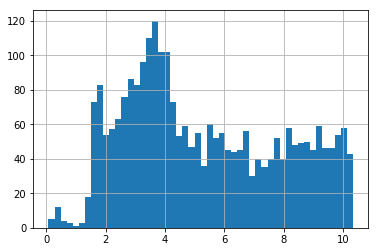

In [55]:
b.mean(1).hist(bins=50);

In [56]:
(b.mean(1)>9.75).sum() 

150

In [57]:
np.abs(b.median(1)-b.mean(1)).mean()

0.020267919979526792

In [58]:
b.mean(1).mean(),b.median(1).mean()

(5.304564788218398, 5.315573487358798)

In [59]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub207_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [60]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub207_a11.csv".format('median'))
p.to_csv(fname,index=None)